In [1]:
import urllib.request as url
import requests as rq
import pandas as pd
import numpy as np
import pprint
import json
import seaborn as sns

## Sec 1 - Working with HTML and JSON

In this section, we'll be working with HTML and JSON formats. This exercise asked us to pick 3 of our favourite books from one of our favourite subjects, and include title, authors, and 2-3 other interesting attributes. The subject of interest here is ‘Marketing’, and the three books are as follows:


-	Marketing Research  by Alvin C. Burns, Ann Veeck, and Ronald F. Bush
-	Consumer Behaviour: A Marketer's Look Into the Consumer Mind by Radhika Duggal
-	Principles of Marketing by Philip Kotler and Gary Armstrong

Both HTML and JSON files were created by hand, and the raw version of each can be found here:

- HTML - https://raw.githubusercontent.com/manasiakre/DAV__5400/main/fav_books.html
- JSON - https://raw.githubusercontent.com/manasiakre/DAV__5400/main/Fav_Books.json

To import the files into our Jupyter Notebook, we'll be using pd.read_html (for the HTML file) and pd.read_json (for the JSON file). This will convert the content in the link into a Pandas DataFrame (tabular format). The results are given below:

In [62]:
# html file

books = pd.read_html('https://raw.githubusercontent.com/manasiakre/DAV__5400/main/fav_books.html')
fav = books[0]
fav

Empty DataFrame
Columns: [(Title, Marketing Research, Consumer Behavior: A Marketer's Look Into the Consumer Mind, Principles of Marketing), (Author, Alvin C. Burns, Radhika Duggal, Philip Kotler), (Author, Ann Veeck, Unnamed: 2_level_2, Gary Armstrong), (Author, Ronald F. Bush, Unnamed: 3_level_2, Unnamed: 3_level_3), (Year Published, 2017, 2018, 2018), (Publisher, Pearson, Stukent, Pearson), (Pages, 490, 224, 736)]
Index: []

In [63]:
# json file

books_2 = pd.read_json('https://raw.githubusercontent.com/manasiakre/DAV__5400/main/Fav_Books.json')
fav_2 = books[0]
fav_2

Empty DataFrame
Columns: [(Title, Marketing Research, Consumer Behavior: A Marketer's Look Into the Consumer Mind, Principles of Marketing), (Author, Alvin C. Burns, Radhika Duggal, Philip Kotler), (Author, Ann Veeck, Unnamed: 2_level_2, Gary Armstrong), (Author, Ronald F. Bush, Unnamed: 3_level_2, Unnamed: 3_level_3), (Year Published, 2017, 2018, 2018), (Publisher, Pearson, Stukent, Pearson), (Pages, 490, 224, 736)]
Index: []

From the first glance at the table, we can find no difference. Let us take a deeper look by using pd.DataFrame.info() to get the complete description of the table.

In [52]:
# for html file
fav.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   (Title, Marketing Research, Consumer Behavior: A Marketer's Look Into the Consumer Mind, Principles of Marketing)  0 non-null      object
 1   (Author, Alvin C. Burns, Radhika Duggal, Philip Kotler)                                                            0 non-null      object
 2   (Author, Ann Veeck, Unnamed: 2_level_2, Gary Armstrong)                                                            0 non-null      object
 3   (Author, Ronald F. Bush, Unnamed: 3_level_2, Unnamed: 3_level_3)                                                   0 non-null      object
 4   (Year Published, 2017, 2018, 2018)                

In [64]:
#for json file
fav_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   (Title, Marketing Research, Consumer Behavior: A Marketer's Look Into the Consumer Mind, Principles of Marketing)  0 non-null      object
 1   (Author, Alvin C. Burns, Radhika Duggal, Philip Kotler)                                                            0 non-null      object
 2   (Author, Ann Veeck, Unnamed: 2_level_2, Gary Armstrong)                                                            0 non-null      object
 3   (Author, Ronald F. Bush, Unnamed: 3_level_2, Unnamed: 3_level_3)                                                   0 non-null      object
 4   (Year Published, 2017, 2018, 2018)                

They're both the same, and hence have no difference.

## Sec 2 - Scraping the Katz School’s AI Faculty Web Page

Here, we'll be extracting content from Katz School'd AI faculty web page in the following format:

- **Name:** *relevant content*
- **Title:** *relevant content*
- **Bio:** *complete relevant content*
- **Teaching Background:** *complete relevant content*

For example, for faculty member Paul Russo, the valid output should look like this:

- **Name:** Paul Russo
- **Title:** Ph.D. Vice Provost and Dean
- **Bio:** Recent research examines ... the CUNY Center for Big Data.
- **Teaching Background:** Teaches graduate ... supervision.

**Step 1 - Download the webpage**
We'll start by downloading the webpage from Katz's website on AI faculties, where 'ai_fac' is a self-defined variable holding the URL of the webpage we want to download. On the next line, we use 'urlopen' to open the webpage found at the specified URL and save this response under the variable 'resp'. 'Resp' now contains the open version of the webpage, which we'll store under the variable 'web' using 'read'. Finally, we'll print the variable 'web' to get the open version of the webpage.

**Step 2 - Parse the webpage using BeautifulSoup**
Once the page is downloaded, we'll parse its content using [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/), a Python library that extracts HTML and XML files from websites. We use 'html.parser' to indicate that we want to do the parsing using Python’s built-in HTML parser.

**Step 3 - Locating div with class = 'body'**
The next step is to extract the data that is enclosed within the 'body' tag in the webpage's HTML code. We can do this using 'soup.find' to return the first body tag we can find in the webpage's open source. 

**Step 4 - Creating Pandas DataFrame with storage capability**
Since we need some frame where we can store the data we extracted in step 3 in an organized format, we'll make one using pandas. This DataFrame will have columns like 'Name', 'Title', 'Bio', and 'Teaching Background'. 

**Step 5 - Allot the data to the DataFrame**
The final step would be to take the data from step 3 and assign it into its respective heads (columns) created in step 4. We'll look into this in detail later.

In [4]:
# step 1
# downloading the webpage containing Katz School's AI Faculty information
# source - https://programminghistorian.org/en/lessons/working-with-web-pages

ai_fac = 'https://www.yu.edu/katz/programs/graduate/artificial-intelligence/faculty'
resp = url.urlopen(ai_fac)
web = resp.read()
print(web)

b'\n<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n  <head>\n    <!-- Google Tag Manager -->\n    <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n                new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n            j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n            \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n        })(window,document,\'script\',\'dataLayer\',\'GTM-PSVTTKK\');</script>\n    <!-- End Google Tag Manager -->\n    <!-- Start VWO Async Smartcode -->\n    <script type=\'text/

In [5]:
# step 2
# creating BeautifulSoup class to parse the downloaded page
# source: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

from bs4 import BeautifulSoup
soup = BeautifulSoup(web, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
            j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
            'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-PSVTTKK');
  </script>
  <!-- End Google Tag Manager -->
  <!-- Start VWO Async Smartcode -->
  <script type="text/javascript">
   window._vwo_code = win

In [10]:
# step 3
# locating 'div' with class = 'body'
# source: https://towardsdatascience.com/web-scraping-using-python-4cb2faade338

faculty = soup.find('div', {"class": "body"})
print(faculty)

<div class="body"><h5>Paul Russo, Ph.D. Vice Provost and Dean</h5>
<p>Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&amp;Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collection systems that identify particles emitted as deep space materials degrade. Ethnographic studies in the use of technology in distributed science collaborations. Active peer reviewer. Co-P

In [8]:
# step 4
# creating pandas dataframe with required columns

faculty_info = pd.DataFrame(columns = ['Name', 'Title', 'Bio','Teaching Background'], dtype = 'string')
print(faculty_info)

Empty DataFrame
Columns: [Name, Title, Bio, Teaching Background]
Index: []


Before going to step 5, we'll convert the data acquired via BeautifulSoup into a more readeable format. 

In [65]:
# for a cleaner redeability of the data
# child is the tags inside faculty. grandchild is text inside those tags

for child in faculty.children:
    for grandchild in child:
        print(grandchild)

Paul Russo, Ph.D. Vice Provost and Dean


Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collection systems that identify particles emitted as deep space materials degrade. Ethnographic studies in the use of technology in distributed science collaborations. Active peer reviewer. Co-PI for a $15M award to create the

For Step 5, we'll segregate the data into four sections - name, title, bio, and teaching background - so that we can fit them into the Pandas DataFrame we created in Step 4. We'll use the 'for' loop for this and .

Note that the information is stored in two kinds of HTML tags - h5 (heading) and p (paragraph). h5 contains names and titles, whereas bio and teaching background can b found in p. 

In [11]:
# step 5
# segregating data into 'name'(n), 'title'(t), 'bio'(b), and teaching backgroud (tb)
# source - https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-the-tree

h5 = faculty.find_all('h5')
p = faculty.find_all('p')

n = [] # empty list for names
t = [] # empty list for titles 
b = [] # empty list for bio
tb = [] # empty list for teaching background

# segregating name and title from h5
for i in range(len(h5)):
    for string in h5[i].stripped_strings: # 'stripped_string' removes extra whitespace
        x = (repr(string))   
    ind = x.find(',')     
    n.append(x[1:ind])      
    t.append(x[ind+2:-1])
print(n)
print(t)

# segregating bio and teaching background from p
for i in range(0, len(p), 2):
    for string in p[i].stripped_strings:
        x = (repr(string))
        x = x[1:-1].replace('\\xa0', ' ')
        x = x.replace('  ', ' ')
    for string in p[i+1].stripped_strings:
        y = (repr(string))
        y = y[1:-1].replace('\\xa0', ' ')
        y = y.replace('  ', ' ')
    b.append(x)
    tb.append(y)
print(b)
print(tb)

['Paul Russo', 'Andy Catlin', 'Wonjun Lee', 'Sergey Fogelson', 'Lawrence Fulton', 'Jeff Nieman']
['Ph.D. Vice Provost and Dean', 'Program Director, Data Analytics and Visualization', 'Assistant Professor, Artificial Intelligence', 'Instructor', 'Instructor', 'Instructor']
['Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build

Now we'll allocate the segregated data into the DataFrame we created earlier in Step 4.

In [68]:
# alloting the segregated data to faculty_info datafram

d = {'Name': n, 'Title': t, 'Bio': b, 'Teaching Background': tb} #dictionary created
df = pd.DataFrame(data = d) #df stores the dictionary as dataframe
faculty_info=faculty_info.append(df, ignore_index = True)#appending df to faculty_info
faculty_info.head()

,Name,Title,Bio,Teaching Background
0,Paul Russo,Ph.D. Vice Provost and Dean,Recent research examines computational methods...,"Teaches graduate courses in Social Computing, ..."
1,Andy Catlin,"Program Director, Data Analytics and Visualiza...",Data scientist and data system developer with ...,Teaches graduate courses in Analytics Programm...
2,Wonjun Lee,"Assistant Professor, Artificial Intelligence",Recent research focuses on designing AI-based ...,Teaches graduate courses in Security Analytics...
3,Sergey Fogelson,Instructor,Data scientist and data product architect with...,Teaches graduate courses in Computational Stat...
4,Lawrence Fulton,Instructor,Health data scientist with expertise in machin...,"Teaches graduate courses in Data Analytics, Ma..."


However, this is still not in the format as given in the assignment. Morevoer, we cannot read the entire content, especially in the bio and teaching background columns. We'll once again make use of the 'for' loop, combined with 'iloc'(index locator), to get a more readeable format.

In [15]:
for i in range(6):
    print("\033[1mName:\033[0m", faculty_info.iloc[i,0]) #'\033[1m' prints bold text, '\033[0m' changes it back to normal
    
    print("\033[1mTitle:\033[0m",faculty_info.iloc[i,1])
    
    print("\033[1mBio:\033[0m",faculty_info.iloc[i,2])
    
    print("\033[1mTeaching Background:\033[0m",faculty_info.iloc[i,3])
    print()

Name: Paul Russo
Title: Ph.D. Vice Provost and Dean
Bio: Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collection systems that identify particles emitted as deep space materials degrade. Ethnographic studies in the use of technology in distributed science collaborations. Active peer reviewer. Co-PI for a $15M awar

## Working with Web API’s

The New York Times is a daily newspaper based in New York City with wide international readership. It was founded in 1851, and has long been regarded within the industry as a national "newspaper of record". It is ranked 18th in the world by circulation and 3rd in the U.S.

**About NYT's API:**
New York Times' API contains up-to-date links and metadata of all the NYTs articles and other materials. It currently has 10 APIs: Archive, Article Search, Books, Community, Geographic, Most Popular, Semantic, Times Newswire, TimesTags, and Top Stories. Data returned by API is in JSON format.

For this assignment, we'll sorely focus on Article Search API, and further narrowing it down to news articles on 'elections'. We'll begin by first signing up on NYT API's webpage and acquiring the [key](https://developer.nytimes.com/get-started) for [Article Search API](https://developer.nytimes.com/apis). Once we have this, we'll download the webpage with the API key into the Jupyter Notebook. 

Please note that we're narrowing down our search to news related to 'elections', and will be downloading only that data.

In [16]:
# downloading the webpage
r = rq.get("https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election?&api-key=ZmTz0SZeTpeJrNa07gmjfHWAUWv8i6WE")
nyt = r.json()
display(nyt)

{'status': 'OK',
 'copyright': 'Copyright (c) 2021 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'abstract': 'A newly declassified intelligence report made clear that government agencies long knew of Russia’s work to aid Donald Trump, but he and allies muddied the waters.',
    'web_url': 'https://www.nytimes.com/2021/03/17/us/politics/russia-elections-trump-intelligence.html',
    'snippet': 'A newly declassified intelligence report made clear that government agencies long knew of Russia’s work to aid Donald Trump, but he and allies muddied the waters.',
    'lead_paragraph': 'WASHINGTON — Representative Jason Crow listened during a classified briefing last summer while a top intelligence official said that Russia was hurting Joseph R. Biden Jr.’s campaign to help President Donald J. Trump.',
    'print_section': 'A',
    'print_page': '11',
    'source': 'The New York Times',
    'multimedia': [{'rank': 0,
      'subtype': 'xlarge',
      'caption': None,

Next, we'll convert the same into a tabular format. This can be done by converting the acquired json data into a Pandas DataFrame.

In [18]:
# source - H_Kausar_P2_assn
nyt_df = pd.DataFrame(nyt['response']['docs'])
nyt_df

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,subsection_name,byline,type_of_material,_id,word_count,uri
0,A newly declassified intelligence report made ...,https://www.nytimes.com/2021/03/17/us/politics...,A newly declassified intelligence report made ...,WASHINGTON — Representative Jason Crow listene...,A,11,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'The Intelligence on Russia Was Clear...,"[{'name': 'subject', 'value': 'Presidential El...",2021-03-17T23:06:48+0000,article,Washington,U.S.,Politics,"{'original': 'By Julian E. Barnes', 'person': ...",News,nyt://article/a5cbb2bc-ba9a-580f-b30e-724b765c...,1192,nyt://article/a5cbb2bc-ba9a-580f-b30e-724b765c...
1,The assessment was the intelligence community’...,https://www.nytimes.com/2021/03/16/us/politics...,The assessment was the intelligence community’...,WASHINGTON — President Vladimir V. Putin of Ru...,A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Russian Interference in 2020 Include...,"[{'name': 'subject', 'value': 'Presidential El...",2021-03-16T20:03:13+0000,article,Washington,U.S.,Politics,"{'original': 'By Julian E. Barnes', 'person': ...",News,nyt://article/1d6ce567-3810-5c40-8003-e934a954...,1517,nyt://article/1d6ce567-3810-5c40-8003-e934a954...
2,The Treasury Department accused seven Ukrainia...,https://www.nytimes.com/2021/01/11/us/politics...,The Treasury Department accused seven Ukrainia...,WASHINGTON — The Trump administration imposed ...,A,9,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'U.S. Imposes Sanctions on Ukrainians...,"[{'name': 'glocations', 'value': 'Ukraine', 'r...",2021-01-11T20:32:00+0000,article,Washington,U.S.,Politics,{'original': 'By Kenneth P. Vogel and Pranshu ...,News,nyt://article/d44c2f07-3d56-5bac-9c9e-7a61ee0e...,1079,nyt://article/d44c2f07-3d56-5bac-9c9e-7a61ee0e...
3,Trump urges his backers to vote in the Georgia...,https://www.nytimes.com/2021/01/05/us/politics...,Trump urges his backers to vote in the Georgia...,President Trump posted a pair of tweets 12 min...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Trump urges backers to vote in runof...,"[{'name': 'subject', 'value': 'Elections, Sena...",2021-01-05T18:05:52+0000,article,Politics,U.S.,Politics,"{'original': 'By Glenn Thrush', 'person': [{'f...",News,nyt://article/98a3b7dc-22ab-5905-b673-c0574fe5...,249,nyt://article/98a3b7dc-22ab-5905-b673-c0574fe5...
4,See full results and maps from the Louisiana s...,https://www.nytimes.com/interactive/2021/03/20...,See full results and maps from the Louisiana s...,See full results and maps from the Louisiana s...,NaN,NaN,The New York Times,[],{'main': 'Louisiana Primary Election Results 2...,"[{'name': 'subject', 'value': 'Elections', 'ra...",2021-03-20T21:49:08+0000,multimedia,U.S.,U.S.,Elections,"{'original': None, 'person': [], 'organization...",Interactive Feature,nyt://interactive/6c32c981-da94-5215-8fbf-e453...,0,nyt://interactive/6c32c981-da94-5215-8fbf-e453...
5,But that may not be a good sign after all.,https://www.nytimes.com/2021/03/17/opinion/isr...,But that may not be a good sign after all.,"On March 23, Israel will go to the polls for i...",A,26,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'What’s Missing in Israel’s Election?...,"[{'name': 'subject', 'value': 'Elections', 'ra...",2021-03-17T09:00:08+0000,article,OpEd,Opinion,NaN,"{'original': 'By Shmuel Rosner', 'person': [{'...",Op-Ed,nyt://article/55cbf7b3-e9d2-50a3-bf4f-d44cfbed...,948,nyt://article/55cbf7b3-e9d2-50a3-bf4f-d44cfbed...
6,The promise of universal suffrage has animated...,https://www.nytimes.com/2021/03/20/world/asia/...,The promise of universal suffrage has animated...,"HONG KONG — From her first protest at age 12, ...",A,12,The New York Times,"[{'rank': 0, 'subtype': 

There are 10 rows and 18 columns in the table. Since the table isn't showing the complete text, especially for columns abstract, snippet, and lead_paragraph, we'll print these, along with URL and headlines, seperately so as to get the complete content within these columns. We'll follow the same codes as we did in Section 2 (scraping Katz's wepage) last question.

In [73]:
for i in range(10):
    print("\033[1mabstact:\033[0m", nyt_df.iloc[i,0]) #'\033[1m' prints bold text, '\033[0m' changes it back to normal
     
    print("\033[1mweb_url:\033[0m",nyt_df.iloc[i,1])
    
    print("\033[1msnippet:\033[0m",nyt_df.iloc[i,2])
    
    print("\033[1mlead_paragraph:\033[0m",nyt_df.iloc[i,3])
    
    print("\033[1mheadline:\033[0m",nyt_df.iloc[i,8])
    print()
   

abstact: A newly declassified intelligence report made clear that government agencies long knew of Russia’s work to aid Donald Trump, but he and allies muddied the waters.
web_url: https://www.nytimes.com/2021/03/17/us/politics/russia-elections-trump-intelligence.html
snippet: A newly declassified intelligence report made clear that government agencies long knew of Russia’s work to aid Donald Trump, but he and allies muddied the waters.
lead_paragraph: WASHINGTON — Representative Jason Crow listened during a classified briefing last summer while a top intelligence official said that Russia was hurting Joseph R. Biden Jr.’s campaign to help President Donald J. Trump.
headline: {'main': 'The Intelligence on Russia Was Clear. It Was Not Always Presented That Way.', 'kicker': None, 'content_kicker': None, 'print_headline': 'Deference to Trump Blurred Intelligence Warnings on Russia  ', 'name': None, 'seo': None, 'sub': None}

abstact: The assessment was the intelligence community’s most co

The above format will help us, or anyone accessing the table, read through the previously 'partial' information.

Next, we will see under what sections, sub sections, and type of materials do these news articles fall under. We'll do this by ploting a simple bar graph for each.

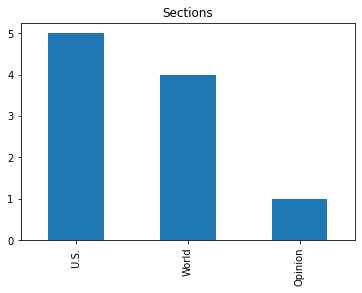

In [20]:
#section
section = nyt_df['section_name'].value_counts().plot.bar(title = "Sections")
section;

Out of 10 news articles, 5 fall under 'U.S', 4 under 'World', and 1 under 'Opinion'. Though NYT majorly focuses on news in the U.S., they also have a good grasp of international news. 

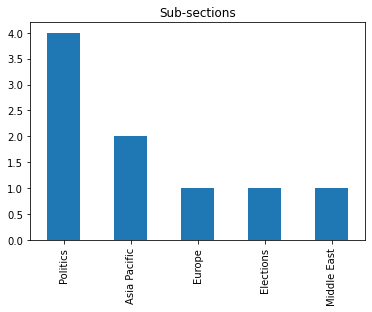

In [21]:
# sub-section
sub_section = nyt_df['subsection_name'].value_counts().plot.bar(title = "Sub-sections")
sub_section;

Out of 10 news articles, 4 fall under 'Politics', 2 under 'Asia Pacific', and 1 under 'Europe', 'Middle East', and 'Elections' each. Since 'elections' is a political topic, this distribution makes sense. However, this also shows that NYT can improve on how they create their sub-section tagging, since 'Elections' has only one article under it and all articles in the table are related to elections. If someone want to access news regarding elections, he or she may get confused whether to access politics sub-section or elections.

However, the one news material that is tagged under 'Election' is an interactive media, hence it is possible that these taggings happen according to the type of news material NYT is publishing, which is shown below.

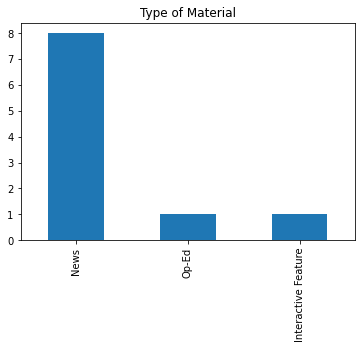

In [22]:
# type of material
mat_type = nyt_df['type_of_material'].value_counts().plot.bar(title = "Type of Material")
mat_type;

Out of 10 news materials, 8 are 'News', and 1 is 'Op-Ed' (commentary) and 'Interactive Feature'. Here, NYT shows that it has a preference for publishing news articles more than any other kind of media. 

Next, we want to check what kind of keywords have been alloted to the each of the articles. We can do this as follows. This will give us an idea about what the news articles are about, and what words one can type in the search bar to get the corresponding news reports.

In [146]:
# keywords list for each article
k=[]

for i in range(10):
    for j in range(len(nyt_df.iloc[i,9])):
        k.append(nyt_df.iloc[i,9][j])
print(k)

[{'name': 'subject', 'value': 'Presidential Election of 2020', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'value': 'Classified Information and State Secrets', 'rank': 2, 'major': 'N'}, {'name': 'subject', 'value': 'Espionage and Intelligence Services', 'rank': 3, 'major': 'N'}, {'name': 'subject', 'value': 'Rumors and Misinformation', 'rank': 4, 'major': 'N'}, {'name': 'subject', 'value': 'Propaganda', 'rank': 5, 'major': 'N'}, {'name': 'organizations', 'value': 'Office of the Director of National Intelligence', 'rank': 6, 'major': 'N'}, {'name': 'organizations', 'value': 'House of Representatives', 'rank': 7, 'major': 'N'}, {'name': 'glocations', 'value': 'China', 'rank': 8, 'major': 'N'}, {'name': 'glocations', 'value': 'Russia', 'rank': 9, 'major': 'N'}, {'name': 'persons', 'value': 'Pierson, Shelby', 'rank': 10, 'major': 'N'}, {'name': 'persons', 'value': 'Ratcliffe, John Lee (1965- )', 'rank': 11, 'major': 'N'}, {'name': 'persons', 'value': 'Grenell, Richard', 'rank': 12, 'majo

We can also put the keywords in a tabular format as follows:

In [153]:
key_table= pd.DataFrame(k)
key_table.head(10)

,name,value,rank,major
0,subject,Presidential Election of 2020,1,N
1,subject,Classified Information and State Secrets,2,N
2,subject,Espionage and Intelligence Services,3,N
3,subject,Rumors and Misinformation,4,N
4,subject,Propaganda,5,N
5,organizations,Office of the Director of National Intelligence,6,N
6,organizations,House of Representatives,7,N
7,glocations,China,8,N
8,glocations,Russia,9,N
9,persons,"Pierson, Shelby",10,N


As we can see, 'Presidential Election of 2020' ranks first in the list, meaning that this was the most important keyword for the articles in the 'election' category. This is followed by keywords 'Classified Information and State Secrets', 'Espionage and Intelligence Services', and 'Rumors and Misinformation'. The news articles gathered from the API are also in tune with these keywords, with many discussing the potential involvement of foreign entities in the Presidential elections.